<a href="https://colab.research.google.com/github/DrMorganJones/ACS6427/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, Math

# Laboratory Class Four: Nonlinear Regression and Neural Networks

## 1. Goal:
This lab supplements the lecture material on nonlinear optimization. The intended learning outcomes of this lab are as follows:
1. To be able to implement gradient descent to solve nonlinear optimization problems.
2. To be able to fit neural networks to data.

## Background Material
**Nonlinear Optimisation:** Consider the following unconstrained optimization problem where we seek to minimize some function, $J:ℝ^m ⟶ ℝ$,

\begin{equation}
θ^* ϵ\ \textrm{arg inf}\ j(θ)\tag{1}
\end{equation}

In order for a point, denoted as $θ^∗$
, to be a solution to the optimization problem described by Opt. (1), a necessary condition is that $θ^∗$ satisfies the stationary point criterion, $∇J(θ^∗) = 0$. Unfortunately, when dealing with general nonlinear functions, the equationfor stationary points, $∇J(θ) = 0$, can sometimes yield multiple solutions, and in certain cases, it may even lead to transcendental
equations for which analytical solutions are not readily available. Consequently, addressing optimization problems like Opt. (1) often
necessitates the use of approximate numerical methods. One widely employed approach in this context is Gradient Descent (GD).
GD operates as an iterative approach, initiated with a randomly selected starting point. It subsequently guides us along paths
where the objective function J descends, aiming to reach a point that minimizes J on a global scale. Unfortunately achieving the
global minimum is not always guaranteed due to the presence of local minima and saddle points within the optimization landscape.

Fortunately, in the domain of machine learning, obtaining exact solutions is not always a strict requirement. This is because real-
world data inherently contains noise and imperfections. Therefore, the pursuit of global minima may be less critical, as we must be

cautious not to overfit our models to noise in the data.
We have seen in lectures that the direction in which the function J deceases at some point $θ ∈ ℝ^m$ is given by $−∇J(θ)$. Now scaling this direction by a learning rate $α ∈ (0,1)$, so we don’t over shoot the minimum point we get the GD algorithm,

\begin{equation}
θ_0 = \textrm{random initialisation}\\
θ_i+1 = θ_i - α∇J(θ_i) \tag{2}
\end{equation}



**Neural Networks:** A Neural Network (NN) is a special type of function that maps inputs to outputs: $x → y$. What distinguishes NNs from other functions is that the input is iteratively weighted, summed and passed through a nonlinear activation function. NNs are very expressive and can approximate to arbitrary accuracy many classes of functions (like polynomials). To fit NNs to data we
optimise over the weights, however, these weights appear non-linearly due to the activation functions. Therefore fitting a NN to data is a nonlinear optimisation problem with no analytical solution. In the absence of analytical solutions we can only approximately fit NNs to data and rely on iterative methods like gradient descent, only having local minimum guarantees. Figure 1 represents the architecture of a NN. From the figure we can see that evaluating a NN requires the following operations:
* **Input layer:** This layer receives the input data to the NN. Inputs are typically denoted as $x = [x1,..., xn]^T > ∈ ℝ^n$.
* **Weight multiplication:** This block multiplies the output of the previous layer by the corresponding weights. If we are at layer $k$ and denote the output of the $j$'th neuron of previous layer by $a^{(k−1)}_j$
then in this layer we multiply the following weights to get $z^{(k)}_i = ∑^{n_k−1}_{j=1} w^{(k)}_{i,j},a^{(k−1)}_j$, where $z^{(k)}_i$
represents the weighted sum of activations from layer $k−1$ that will be inputted into the activation function for neuron $i$ layer $k$.
* **Activation:** This block performs an activation function on the output of the weighted sum multiplication. Activation functions are used to introduce non-linearity into the neural network, which makes it more powerful. If  $z_i^{(k)}$ represents the layer $k$ weighted sum of activations then $a_i^{(k)}=\sigma(z_i^{(k)})$, where $\sigma$ is some activation function, for instance it could be the sigmoid function $\sigma(x) = \frac{1}{1 + e^{-x}}$.
* **Output Layer:** This layer produces the final output of the neural network. This is usually denoted by $y$.

Note, in NN notation $z_1^{(k)}$ or $z_1^{(k)}$ or $w_{1,1}^{(k)} $, etc does not mean to the power of $k$. Here $(k)$ is an index that refers which layer the parameter belongs to. Alternatively you could imagine $W$ as a multidimensional array rather than a matrix where $w_{i,j}^{(k)}=W_{i,j,k}$ refers to the weight connection at layer $k$ between the $j$'th neuron of layer $k-1$ and $i$'th neuron of layer $k$.

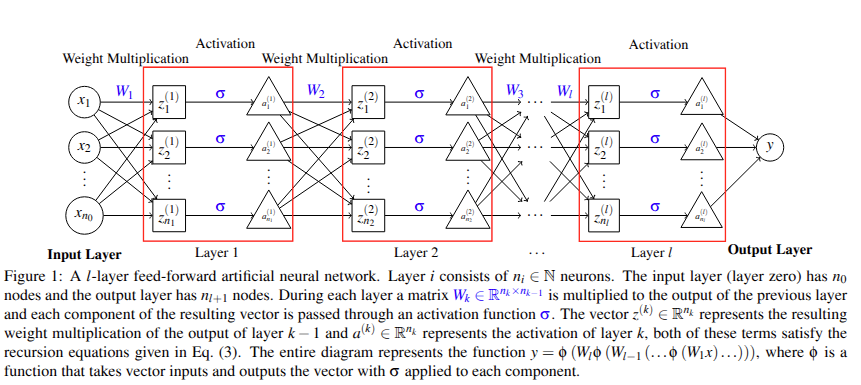

Mathematically evaluating the NN shown in Fig.~\ref{fig:NN} boils down to recursively iterating a recursion equation. To see this let us consider the following functions,
\begin{equation}
z^{(k)}(x):= {W}_k ϕ {W}_{k-1}(... \phi({W}_1 x)) ϵℝ^{n_k}\\
a^{(k)}(x):=\phi({W}_k \phi({W}_{k-1}(... \phi({W}_1 x)...))) ϵ^{n_k}.
\end{equation}
Clearly $z^{(k)}$ and $a^{(k)}$ satisfy the following recursion equations:

\begin{equation}
	z^{(1)}(x) = W_1 x \\
	z^{(k)}(x) = W_k a^{(k-1)}(x)  \text{for } k \in \{2, ..., l\} \\
	a^{(k)}(x) = \phi(z^{(k)}(x))  \text{for } k \in \{1, ..., l\} \\
	y = a^{(l)}(x)  \tag{3}
\end{equation}

where
\begin{equation}
a^{(k)}(x) := \begin{bmatrix}
		a_1^{(k)}(x) \\
		\vdots \\
		a_{n_k}^{(k)}(x)
	\end{bmatrix} ϵ ℝ^{n_k}, \text{ }
	z^{(k)}(x) := \begin{bmatrix}
		z_1^{(k)}(x) \\
		\vdots \\
		z_{n_k}^{(k)}(x)
	\end{bmatrix}ϵ ℝ^{n_k}, \text{ }
	\phi(z^{(k)}(x)) := \begin{bmatrix}
		\sigma(z_1^{(k)}(x)) \\
		\vdots \\
		\sigma(z_{n_k}^{(k)}(x))
	\end{bmatrix} ϵ ℝ^{n_k}, \text{ }\\
	W_k:=  \begin{bmatrix}
		w_{1,1}^{(k)} & \cdots & w_{1,n_{k-1}}^{(k)} \\
		\vdots & \ddots & \vdots \\
		w_{n_k,1}^{(k)} & \cdots & w_{n_k,n_{k-1}}^{(k)}
	\end{bmatrix}ϵ ℝ^{n_k \times n_{k-1}} .
\end{equation}

Given a data set $\{(x_i,y_i)\}_{i=1}^N$ we then formulate the problem of fitting a NN as a nonlinear optimization problem that minimizes the Mean Squares Error (MSE),
\begin{equation}
\inf_{(W_l, \ldots, W_0 )} J(W_1,\dots W_l):=  \sum_{i=1}^{N}  \bigg(y_i - \phi(W_l \phi\left(W_{l-1} (\ldots \phi(W_1 x_i\right) \ldots)))\bigg)^2. \tag{4}
\end{equation}

Equation (4) is an unconstrained optimization problem of the form given in Eq. 1 and therefore can be approximately be solved using GD. To implement the GD algorithm we must calculate the gradient of the objective, $\nabla J$. Because of the recursive structure of the NN the gradient of the objective can also be calculated in a recursive manner. Using recursion is a form of *Dynamic Programming (DP)* where computer memory is harnessed to avoid repeated calculations. To see how we can use DP to compute the derivatives of NNs, and hence derive the famous backprogagtion algorithm, we must first recall the multivariate chain rule of differentiation. Consider differentiable functions $F: ℝ^n \to ℝ$ and $g:ℝ^m \to ℝ$ then

\begin{equation}
	\frac{\partial}{\partial x_i} F(g_1(x), \dots, g_n(x))= \sum_{j=1}^n (\frac{\partial}{\partial y_j} F(y) \bigg|_{y=(g_1(x), \dots, g_n(x))}) \frac{\partial}{\partial x_i} g_j(x). \tag{5}
\end{equation}

Note, $\frac{\partial}{\partial y_j} F(y) \bigg|_{y=(g_1(x), \dots, g_n(x))} $ is the the partial derivative of the $j$'th argument of $F$ evaluated at $(g_1(x), \dots, g_n(x))$ and sometimes notation is slightly abused to denote this quantity as $\frac{\partial}{\partial g_j} F(g_1(x), \dots, g_n(x))$.


Now using the chain rule given in Eq. (5) we can calculate the partial derivatives of the objective from Opt. (4),
\begin{equation}
	\frac{\partial J}{\partial W_{i,j}^{(k)}} = \frac{\partial}{\partial W_{i,j}^{(k)}} \sum_{t=1}^{N} (y_t - \phi(W_l \phi(W_{l-1}(\ldots W_{k+1} \phi(z^{(k)}(x_t)) \ldots))))^2 \\
	= \sum_{q=1}^{n_k}  \sum_{t=1}^{N} \frac{\partial}{\partial z_q^{(k)}(x_t)} (y_t-\phi(W_l \phi(W_{l-1}(\ldots W_{k+1} \phi(z^{(k)}(x_t)) \ldots))))^2 \frac{\partial z_q^{(k)}(x_t)}{\partial W_{i,j}^{(k)}} \\
	=  \sum_{q=1}^{n_k}  \sum_{t=1}^{N} \frac{\partial}{\partial z_q^{(k)}(x_t)} (y_t- \phi(W_l \phi(W_{l-1}(\ldots W_{k+1} \phi(z^{(k)}(x_t)) \ldots))))^2 \frac{\partial }{\partial W_{i,j}^{(k)}} \sum_{w=1}^{n_{k-1}} W_{q,w}^{(k)} a_w^{(k-1)}(x_t) \\
	=  \sum_{t=1}^{N} \bigg(\frac{\partial}{\partial z_i^{(k)}(x_t)} (y_t- \phi(W_l \phi(W_{l-1}(\ldots W_{k+1} \phi(z^{(k)}(x_t)) \ldots))))^2  \bigg) a_j^{(k-1)}(x_t),
\end{equation}
where the above equation follows since all terms in $\frac{\partial }{\partial W_{i,j}^{(k)}} \sum_{w=1}^{n_{k-1}} W_{q,w}^{(k)} a_w^{(k-1)}(x_t)$ are zero apart from when $(q,w)=(i,j)$. For the case of $k=1$ we slightly abuse notation to write $a_j^{(0)}(x_t)=x_{t,j}$, the $j$'th component of the $t$'th data point. Let us now introduce the following notation,
\begin{equation}
	\delta_i^{(k)}(x_t):=\frac{\partial}{\partial z_i^{(k)}(x_t)} (y_t- \phi(W_l \phi(W_{l-1}(\ldots W_{k+1} \phi(z^{(k)}(x_t)) \ldots))))^2.
\end{equation}
Then it follows from Eq.(6) that,
\begin{equation}
	\frac{\partial J}{\partial W_{i,j}^{(k)}}= \sum_{t=1}^N	\delta_i^{(k)}(x_t) a_j^{(k-1)}(x_t) \tag{7}
\end{equation}

Writing the above equation using matrix notation,
\begin{equation}
\frac{\partial J}{\partial {W}_{k}}  =
	\begin{bmatrix}
		\frac{\partial J}{\partial W_{1,1}^{(k)}} & \frac{\partial J}{\partial W_{1,2}^{(k)}} & \cdots & \frac{\partial J}{\partial W_{1,n_{k-1}}^{(k)}} \\
		\frac{\partial J}{\partial W_{2,1}^{(k)}} & \frac{\partial J}{\partial W_{2,2}^{(k)}} & \cdots & \frac{\partial J}{\partial W_{2,n_{k-1}}^{(k)}} \\
		\vdots & \vdots & \ddots & \vdots \\
		\frac{\partial J}{\partial W_{n_k,1}^{(k)}} & \frac{\partial J}{\partial W_{n_k,2}^{(k)}} & \cdots & \frac{\partial J}{\partial W_{n_k,n_{k-1}}^{(k)}}
	\end{bmatrix}= \begin{bmatrix}
\sum_{t=1}^N	\delta_1^{(k)}(x_t) a_1^{(k-1)}(x_t) & \sum_{t=1}^N \delta_1^{(k)}(x_t) a_2^{(k-1)}(x_t) & \cdots & \sum_{t=1}^N \delta_1^{(k)}(x_t) a_{n_{k-1}}^{(k-1)}(x_t) \\
	\sum_{t=1}^N \delta_2^{(k)}(x_t) a_1^{(k-1)}(x_t) & \sum_{t=1}^N\delta_2^{(k)}(x_t) a_2^{(k-1)}(x_t) & \cdots & \sum_{t=1}^N \delta_2^{(k)}(x_t) a_{n_{k-1}}^{(k-1)}(x_t) \\
	\vdots & \vdots & \ddots & \vdots \\
	\sum_{t=1}^N \delta_{n_k}^{(k)}(x_t) a_1^{(k-1)}(x_t) & \sum_{t=1}^N \delta_{n_k}^{(k)}(x_t) a_2^{(k-1)}(x_t) & \cdots & \sum_{t=1}^N \delta_{n_k}^{(k)}(x_t) a_{n_{k-1}}^{(k-1)}(x_t)
\end{bmatrix}\\
= \sum_{t=1}^N
\begin{bmatrix} \delta_1^{(k)}(x_t) \\ \delta_2^{(k)}(x_t) \\ \vdots \\ \delta_{n_k}^{(k)}(x_t)
\end{bmatrix}
\begin{bmatrix}
a_1^{(k-1)}(x_t) &  a_2^{(k-1)}(x_t) & \cdots &  a_{n_{k-1}}^{(k-1)}(x_t) \end{bmatrix} = \sum_{t=1}^N \delta^{(k)}(x_t) a^{(k-1)}(x_t)^\top= \begin{bmatrix} \delta^{(k)}(x_1) \dots \delta^{(k)}(x_N) \end{bmatrix} \begin{bmatrix} a^{(k-1)}(x_1)^\top\\ \vdots \\ a^{(k-1)}(x_N)^\top \end{bmatrix}  . \tag{8}
\end{equation}

Now applying the chain rule given in Eq.(5) to $	\delta_i^{(k)}(x_t)$ we get that,
\begin{equation}
	\delta_{i}^{(k)}(x_t)  = \frac{\partial}{\partial z_{i}^{(k)}(x_t)}  (y_{t} -  \phi(W_{l} \phi(W_{l-1} (\ldots W_{k+1} \phi(z^{(k)}(x_t))) \ldots)))^{2}
	\\
	= \sum_{r=1}^{n_{k+1}} \frac{\partial}{\partial z^{(k+1)}_r(x_t)}  ( y_{t} - \phi(W_{l} \phi(W_{l-1} (\ldots W_{k+2} \phi(z^{(k+1)}(x_t))) \ldots)) )^{2} ( \frac{\partial z^{(k+1)}_r(x_t)}{\partial z_{i}^{(k)}(x_t)} )\\
	= \sum_{r=1}^{n_{k+1}} \delta_{r}^{(k+1)}(x_t) \frac{\partial}{\partial z_{i}^{(k)}(x_t	)} \sum_{q=1}^{n_{k}} w_{r,q}^{(k+1)} \sigma(z_q^{(k)}(x_t)) = \sum_{r=1}^{n_{k+1}} \delta_{r}^{(k+1)}(x_t)  w_{r,i}^{(k+1)} \sigma'(z_{i}^{(k)}(x_t)). \tag{9}
\end{equation}
Moreover, assuming for convenience a scalar output ($z^{(l)} \in ℝ$ that is $n_l=1$), in the case of $k=l$ we have that,
\begin{equation}
	\delta^{(l)}(x_t)  = \frac{\partial}{\partial z^{(l)}(x_t)}  (y_{t} - \sigma(z^{(l)}(x_t)))^{2}=-2(y_t-\sigma(z^{(l)}(x_t)))\sigma'(z^{(l)}(x_t))=-2(y_t-a^{(l)})\sigma'(z^{(l)}(x_t)) %\frac{\partial}{\partial z_{i}^{(l)}} \sum_{t=1}^{N} (y_{t} - \sum_{r=1}^{n_l} w^{(l+1)}_{1,r}\sigma(z^{(l)}_{r}))^{2}=2\sum_{t=1}^{N} (y_{t} - \sum_{r=1}^{n_l} w^{(l+1)}_{1,r}\sigma(z^{(l)}_{r}))w_{1,i}^{(l+1)}\sigma'(z^{(l)}_{i}).
	 \tag{10}
\end{equation}

Lets now write Eq.(9), $	\delta_{i}^{(k)}(x_t)= \sum_{r=1}^{n_{k+1}} \delta_{r}^{(k+1)}(x_t)  w_{r,i}^{(k+1)} \sigma'(z_{i}^{(k)}(x_t))$, in more concise matrix notation (where $\odot$ is the
Hadamard product or element wise product),
\begin{equation}
	\delta^{(k)}(x_t)  = \begin{bmatrix} \delta_1^{(k)}(x_t) \\ \delta_2^{(k)}(x_t) \\ \vdots \\ \delta_{n_k}^{(k)}(x_t) \end{bmatrix}=\begin{bmatrix}  \sum_{r=1}^{n_{k+1}} \delta_r^{(k+1)}(x_t) w_{r,1}^{(k+1)} \sigma'(z_1^{(k)}(x_t)) \\  \sum_{r=1}^{n_{k+1}} \delta_r^{(k+1)}(x_t) w_{r,2}^{(k+1)} \sigma'(z_2^{(k)}(x_t)) \\ \vdots \\ \sum_{r=1}^{n_{k+1}}  \delta_{r}^{(k+1)}(x_t) w_{r,{n_k}}^{(k+1)} \sigma'(z_{n_k}^{(k)}(x_t)) \end{bmatrix}= \begin{bmatrix}  \sum_{r=1}^{n_{k+1}} \delta_r^{(k+1)}(x_t) w_{r,1}^{(k+1)}  \\  \sum_{r=1}^{n_{k+1}} \delta_r^{(k+1)}(x_t) w_{r,2}^{(k+1)} \\ \vdots \\ \sum_{r=1}^{n_{k+1}}  \delta_{r}^{(k+1)}(x_t) w_{r,{n_k}}^{(k+1)}  \end{bmatrix} \odot \begin{bmatrix} \sigma'(z_1^{(k)}(x_t)) \\ \sigma'(z_2^{(k)}(x_t)) \\ \vdots \\ \sigma'(z_{n_k}^{(k)}(x_t)) \end{bmatrix} \\
	=  \begin{bmatrix}
		w_{1,1}^{(k+1)} & \cdots & w_{n_{k+1},1}^{(k+1)} \\
		\vdots & \ddots & \vdots \\
		w_{1,n_{k}}^{(k+1)} & \cdots & w_{n_{k+1},n_{k}}^{(k+1)}
	\end{bmatrix}
	\begin{bmatrix} \delta_1^{(k+1)}(x_t) \\ \delta_2^{(k+1)}(x_t) \\ \vdots \\ \delta_{n_{k+1}}^{(k+1)}(x_t) \end{bmatrix} \odot \begin{bmatrix} \sigma'(z_1^{(k)}(x_t)) \\ \sigma'(z_2^{(k)}(x_t)) \\ \vdots \\ \sigma'(z_{n_k}^{(k)}(x_t)) \end{bmatrix} = W_{k+1}^\top \delta^{(k+1)}(x_t) \odot \phi'(z^{(k)}(x_t)).\\
	\implies \begin{bmatrix} \delta^{(k)}(x_1) \dots \delta^{(k)}(x_N) \end{bmatrix}=W_{k+1}^\top \begin{bmatrix} \delta^{(k+1)}(x_1) \dots \delta^{(k+1)}(x_N) \end{bmatrix} \odot \begin{bmatrix} \phi'(z^{(k)}(x_1)) \dots \phi'(z^{(k)}(x_N)) \end{bmatrix} \tag{11}
\end{equation}

We also can write Eq.(10) more concisely,

\begin{equation}
	\begin{bmatrix} \delta^{(l)}(x_1) \dots \delta^{(l)}(x_N) \end{bmatrix}^\top  = -2\begin{bmatrix}  \left(y_{1} - a^{(l)}(x_1) \right)\sigma'(z^{(l)}(x_1)) \\
	\vdots \\(y_{N} - a^{(l)}(x_N) )\sigma'(z^{(l)}(x_N)) \end{bmatrix}= -2\begin{bmatrix}  y_{1} - a^{(l)}(x_1)  \\
	\vdots \\ y_{N} - a^{(l)}(x_N)  \end{bmatrix} \odot \begin{bmatrix} \sigma'(z^{(l)}(x_1)) \\ \vdots \\ \sigma'(z^{(l)}(x_N))  \end{bmatrix}\\ \implies \begin{bmatrix} \delta^{(l)}(x_1) \dots \delta^{(l)}(x_N) \end{bmatrix}= -2(y^\top - \begin{bmatrix} a^{(l)}(x_1) \dots a^{(l)}(x_N) \end{bmatrix}) \odot \begin{bmatrix} \sigma'(z^{(l)}(x_1))\dots \sigma'(z^{(l)}(x_N)) \end{bmatrix} \tag{12}
\end{equation}

We can now write down the backpropagation algorithm for fitting NNs. Fundamentally this algorithm is GD, given in Eq.(2), where the gradient is recursively calculated using Eqs (8), (11) and (12). Note that the parameters in GD, $\theta ϵ ℝ^m$, use vector notation, whereas, the unknown weights of a NN is a matrix $\{W_kϵ ℝ^{n_k \times n_{k-1}} \}_{k=1}^l$.
We could vectorize these matrices, that is stack matrix columns on top of each other to create vectors. More formally, we could use the following operator: $vec: ℝ^{m \times n} \to ℝ^{mn}$ that is defined by $vec(A):=[a_{1,1}\ \dots\  a_{m,1}\ \dots a_{1,2}\ \dots\ a_{m,2}\ \dots\ a_{1,n}\ \dots\ a_{m,n}]^\top ϵ ℝ^{mn}$. However, it is slightly easier to code, using Matlabs $\texttt{cell}$ function, if we leave the decision variables as matrices and denote $\theta_{i,k} ϵ ℝ^{n_k \times n_{k-1}}$ to mean the weight update of layer $k$ after $i$-iterations of gradient descent. Then, since computing $\theta_{i+1}=\theta_i - \alpha \nabla J(\theta_i)$ is equivalent to looping over and computing $\theta_{i+1,k}=\theta_{i,k} - \alpha \frac{\partial J}{\partial \theta_k}\bigg|_{\theta=\theta_{i} }$ for $k \in \{1,\dots, l\}$ we  get the backpropagation algorithm,
\begin{equation}
	 \theta_{0,k} =\text{ random initialization} \in ℝ^{n_k \times n_{k-1}} \quad \text{for each layer } k \in \{1,\dots,l\}\\
	 \theta_{i+1,k} =\theta_{i,k} - \alpha \frac{\partial J}{\partial W_k} \bigg|_{\theta=\theta_i}\in ℝ^{n_k \times n_{k-1}} \quad \text{for each layer } k \in \{1,\dots,l\} \text{ and GD iteration } i \in \{1,\dots,M\}   \\
		\text{where }  \frac{\partial J}{\partial W_k} \bigg|_{\theta=\theta_i}= \begin{bmatrix} \delta^{(k)}(x_1) \dots \delta^{(k)}(x_N) \end{bmatrix} \begin{bmatrix} a^{(k-1)}(x_1)^\top\\ \vdots \\ a^{(k-1)}(x_N)^\top \end{bmatrix} \text{(by Eq.(8))}, \quad  \delta^{(k)} \text{ is calculated via Eqs(11) and (12)},  \\
	\text{ and } z^{(k)}, a^{(k)} \text{ are calculated through Eq.(13) for weights given by current GD iteration: } W_k=\theta_{i,k}. \tag{13}
\end{equation}



To make implementation easier, Eq. (13) is also provided in pseudo code form in Algorithm 1.
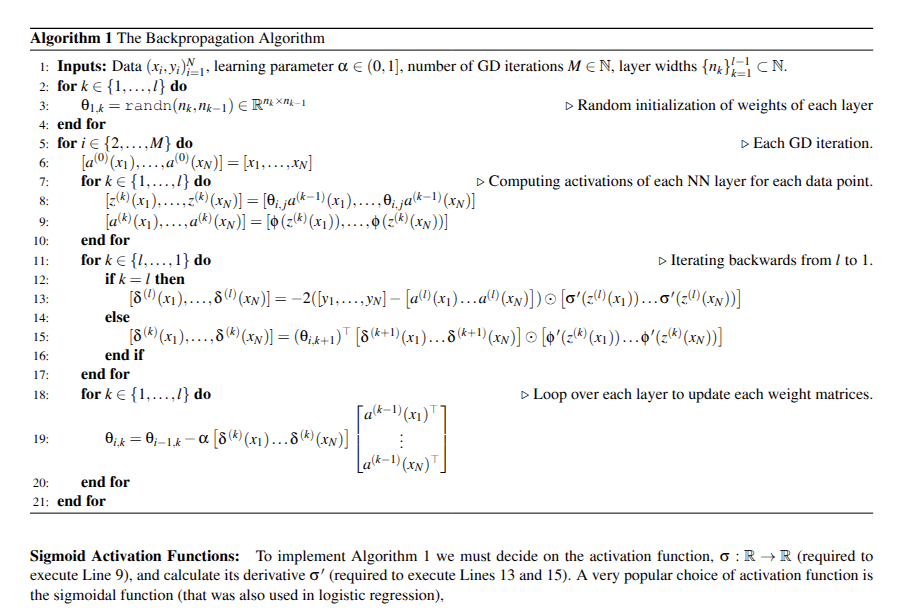

**Sigmoid Activation Functions:**
To implement Algorithm 1 we must decide on the activation function, $\sigma: ℝ \to ℝ$ (required to execute Line 9), and calculate its derivative $\sigma'$ (required to execute Lines 13 and 15). A very popular choice of activation function is the sigmoidal function (that was also used in logistic regression),
\begin{equation}
	\sigma(x)=\frac{e^{  x}}{1+e^{ x}}=\frac{1}{1+e^{-x}}. \tag{14}
\end{equation}
It is fairly straight forward to calculate the derivative of the sigmoid function using the chain rule:
\begin{equation}
	\sigma'(x)=-(1+e^{- x})^{-2} (e^{- x})(-1)=\frac{e^{-x}}{(1+e^{-x})^2}=\left( \frac{e^{  -x}}{1+e^{ -x}} \right) \left( \frac{1}{1+e^{ -x}} \right)=\sigma(x)\left( 1-\frac{e^{ -x}}{1+e^{ -x}} \right)=\sigma(x)(1-\sigma(x)). \tag{15}
\end{equation}
Hence, in the special case of sigmoid activation functions Eq.(11) (or Line 15 in Alg. 1) becomes,
\begin{equation}
	[\delta^{(k)}(x_1),\dots,\delta^{(k)}(x_N)]=(\theta_{i,k+1})^\top \begin{bmatrix} \delta^{(k+1)}(x_1) \dots \delta^{(k+1)}(x_N) \end{bmatrix} \odot \begin{bmatrix} \phi(z^{(k)}(x_1)) \dots \phi(z^{(k)}(x_N)) \end{bmatrix} \odot (\mathbf{1}_{n_k \times N}-\begin{bmatrix} \phi(z^{(k)}(x_1)) \dots \phi(z^{(k)}(x_N)) \end{bmatrix}), \tag{16}
\end{equation}

where $\mathbf{1}_{n_k \times N} \in ℝ^{n_k \times N}$ is the matrix whose elements consist of ones.

Eq.(12) (or Line~13 in Alg 1) becomes,
\begin{equation}
	[\delta^{(l)}(x_1),\dots,\delta^{(l)}(x_N)]=  -2([y_1,\dots,y_N] - \begin{bmatrix} a^{(l)}(x_1) \dots a^{(l)}(x_N) \end{bmatrix}) \odot \begin{bmatrix} \sigma(z^{(l)}(x_1))\dots \sigma(z^{(l)}(x_N)) \end{bmatrix} \odot  \begin{bmatrix} (1-\sigma(z^{(l)}(x_1)))\dots (1-\sigma(z^{(l)}(x_N))) \end{bmatrix}.
	\tag{17}
\end{equation}

 ## **3 Exercises**
 ### **3.1 Task 1**
 The goal of Task 1 is to numerically implement the gradient descent (given in Eq.(2)) to solve nonlinear regression problems.

 #### **Task 1.1**: ####
 The Michaelis–Menten kinetics model of enzymes is given by the following equation
\begin{equation}
	v=\frac{V_{max} S}{K + S}, \tag{18}
\end{equation}
where $V_{max},K \in ℝ$ are unknown model parameters, $v$ is the reaction rate and $S$ is the substrate concentration.  

Suppose an experiment is conducted and the following labelled data is observed, $(S_i,v_i)_{i=1}^N$, this is visualized in Fig.~\ref{fig:Mich curve}. The regression problem for estimating the parameters $\theta:=[V_{\max} , K]^T$ can be formulated as the following optimization problem,
\begin{equation}\theta^* =\arg \inf_{\theta \in ℝ^2} L(\theta), \tag{19}\end{equation}
where $L(\theta):=\sum_{i=1}^N(v_i - \frac{\theta_1 S_i}{\theta_2 + S_i})^2$.  
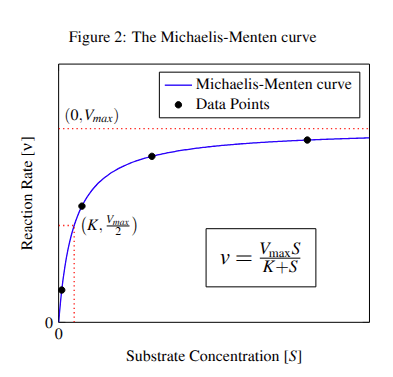

**Calculate an expression for $\nabla L(\theta)$.**

In [ ]:
# @title Hint
#This part of the task requires no code, just use of the chain rule for differentiation

###**Answer 1.1:**
 $\nabla L(\theta)=2[-\sum_{i=1}^N (v_i - \frac{\theta_1 S_i}{\theta_2 + S_i})\frac{S_i}{\theta_2 + S_i}, \sum_{i=1}^N (v_i - \frac{\theta_1 S_i}{\theta_2 + S_i})\frac{\theta_1 S_i}{(\theta_2 + S_i)^2}]^\top$

#### **Task 1.2:**
Suppose the true model parameters of the model given in Eq.18 are $V_{max}=3$ and $K=0.5$. Generate a data set, $(S_i,v_i)_{i=1}^N$, by sampling in the following way,
\begin{equation}  
	v_i=\frac{3 S_i}{0.5 + S_i} + 0.1ϵ \text{ for } S_i \in \{0,0.1,0.2,\dots,10\}, \tag{20}
\end{equation}
where $ϵ \sim \mathcal{N}(0,1)$.

In [3]:
# @title Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential

In [1]:
# @title Answer 1.2
# Define true model parameters
V_max = 3
K = 0.5

# Define the range of S values
S_values = np.arange(0, 10.1, 0.1)

# Number of data points
N = len(S_values)

# Generate data with noise
np.random.seed(0)  # Optional : define seed for reproducability
eps = np.random.randn(N)  # % Generate a random sample from a normal distribution with mean 0 and standard deviation 1
v_data = (V_max * S_values) / (K + S_values) + 0.1 * eps

# Store data in arrays (S_data is just S_values)
S_data = S_values.copy()



####**Task 1.3:**
Based on the gradient of the objective function of Opt.(1) you calculated in a previous task, and the data generated by Eq.(20)) implement gradient descent (given in Eq.2) to find the optimal parameters. Initialize the algorithm at $\theta_0=[5,5]^\top$ with learning parameter $\alpha=0.001$ and compute $1000$ gradient descent iterations. Reproduce the Figure 3. That is

Create a plot with iteration number on the x-axis and training error on the

*   Create a plot with iteration number on the x-axis and training error on the y-axis.
*   Create a plot showing training data, the true model, the learnt model after 10 iterations and the learnt model after $1000$ iterations.
* Create a plot showing how the estimated model parameters change during each iteration of gradient descent.


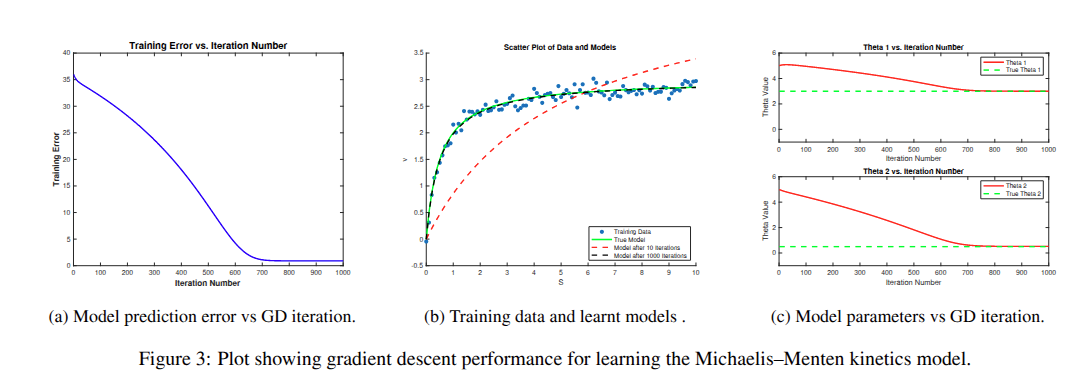



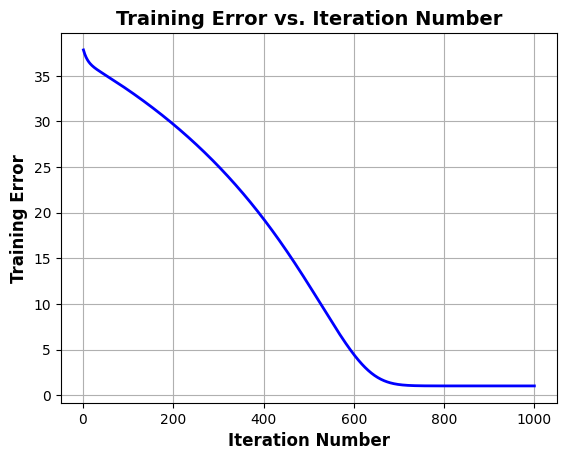

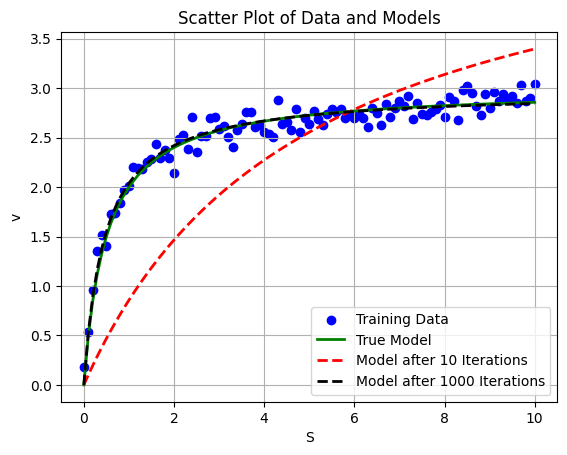

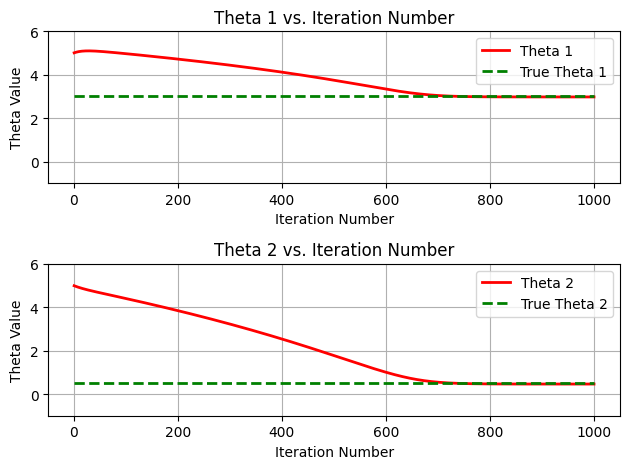

In [4]:
# @title Answer 1.3


# Define the initial guess for theta
theta = np.array([5.0, 5.0])

# Learning rate and number of iterations
learning_rate = 0.001
num_iterations = 1000

# Initialize arrays to store training errors and parameter values
training_errors = np.zeros(num_iterations)
theta_values = np.zeros((num_iterations, 2))

for iteration in range(num_iterations):
    # Predictions
    denom = theta[1] + S_data
    pred_v = (theta[0] * S_data) / denom
    error = v_data - pred_v

    # Calculate the gradient of the loss function
    grad_0 = -2 * np.sum(error * (S_data / denom))
    grad_1 = 2 * np.sum(error * (theta[0] * S_data) / (denom**2))
    gradient = np.array([grad_0, grad_1])

    # Update theta using the gradient and learning rate
    theta -= learning_rate * gradient

    # Store error and theta values
    training_errors[iteration] = np.sum(error ** 2)
    theta_values[iteration] = theta

# Plot training error
plt.figure()
plt.plot(range(1, num_iterations + 1), training_errors, 'b-', linewidth=2)
plt.xlabel('Iteration Number', fontweight='bold', fontsize=12)
plt.ylabel('Training Error', fontweight='bold', fontsize=12)
plt.title('Training Error vs. Iteration Number', fontweight='bold', fontsize=14)
plt.grid(True)

# Plot scatter of data and models
plt.figure()
plt.scatter(S_data, v_data, label='Training Data', color='blue')
plt.plot(S_values, (V_max * S_values) / (K + S_values), 'g', linewidth=2, label='True Model')
plt.plot(S_values, (theta_values[9, 0] * S_values) / (theta_values[9, 1] + S_values), '--r', linewidth=2, label='Model after 10 Iterations')
plt.plot(S_values, (theta_values[-1, 0] * S_values) / (theta_values[-1, 1] + S_values), '--k', linewidth=2, label=f'Model after {num_iterations} Iterations')
plt.xlabel('S')
plt.ylabel('v')
plt.legend(loc='lower right')
plt.title('Scatter Plot of Data and Models')
plt.grid(True)

# Plot theta values
plt.figure()

# Theta 1
plt.subplot(2, 1, 1)
plt.plot(range(1, num_iterations + 1), theta_values[:, 0], '-r', linewidth=2, label='Theta 1')
plt.plot(range(1, num_iterations + 1), V_max * np.ones(num_iterations), '--g', linewidth=2, label='True Theta 1')
plt.xlabel('Iteration Number')
plt.ylabel('Theta Value')
plt.title('Theta 1 vs. Iteration Number')
plt.legend(loc='upper right')
plt.ylim([-1, 6])
plt.grid(True)

# Theta 2
plt.subplot(2, 1, 2)
plt.plot(range(1, num_iterations + 1), theta_values[:, 1], '-r', linewidth=2, label='Theta 2')
plt.plot(range(1, num_iterations + 1), K * np.ones(num_iterations), '--g', linewidth=2, label='True Theta 2')
plt.xlabel('Iteration Number')
plt.ylabel('Theta Value')
plt.title('Theta 2 vs. Iteration Number')
plt.legend(loc='upper right')
plt.ylim([-1, 6])
plt.grid(True)

plt.tight_layout()
plt.show()



####**Task 2**####
The goal of Task 2 is to implement the back-propagation algorithm given in Alg. 1 to train a NN.

**Task 2.1:** We want to generate a synthetic dataset, which can be done in Matlab with their inbuilt function $\texttt{peaks}$, however in Python we must define this manually.
The function is given by
\begin{equation}
	y=\texttt{peaks}(x_1,x_2)=3(1-x_1)^2 e^{-x_1^2 -(x_2+1)^2}-10\left(\frac{x}{5} -x_1^3 -x_2^5 \right)e^{-x_1^2-x_2^2}-\frac{1}{3}e^{-(x_1+1)^2 -x_2^2}.\tag{21}
\end{equation}
Discretize $[-3,3]^2 \subset ℝ^2$ with gap size $0.1$ to get discrete points $x_i \in \{ (-3,-3), (-3,-2.9), (-2.9,-2.9), \dots (3,3) \} $ to generate a data set, $(x_i,y_i)_{i=1}^n$, from the $\texttt{peaks}$ model.

In [5]:
# Step size and domain
x1_vals = np.arange(-3, 3.1, 0.1)
x2_vals = np.arange(-3, 3.1, 0.1)

# Create grid
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Define the peaks function manually
def peaks(x1, x2):
    term1 = 3 * (1 - x1)**2 * np.exp(-x1**2 - (x2 + 1)**2)
    term2 = -10 * (x1 / 5 - x1**3 - x2**5) * np.exp(-x1**2 - x2**2)
    term3 = -1/3 * np.exp(-(x1 + 1)**2 - x2**2)
    return term1 + term2 + term3

# Evaluate peaks function
Y = peaks(X1, X2)


####**Task 2.2:**
We have derived Alg. 1 based on the NN architecture  $	y=\phi\left({W}_l \phi\left({W}_{l-1} \left(\ldots \phi\left({W}_1 x\right) \ldots\right)\right)\right)$, visualized in Fig.1. Since the NN terminates after passing through the activation function, $\phi$, and we consider sigmoid activation functions (given in Eq.14) the outputs of this NN will always between $[0,1]$. The peaks function takes values outside of $[0,1]$ so let us now re-scale the dataset in the following way:


*   Take the absolute value of each of the output/label data.
*   Divide all output/label data by the maximum value (normalize it).



In [6]:
# @title Answer 2.2

# Flatten grid and output values
x1 = X1.ravel()
x2 = X2.ravel()
y  = Y.ravel()

# Make targets non-negative and normalize to [0, 1]
y = np.abs(y)
y = y / np.max(y)

# Stack inputs
inputs = np.column_stack((x1, x2))  # Shape: (n_samples, 2)
targets = y                         # Shape: (n_samples,)

####**Task 2.3:**
Randomly generate an input and a set of weights. Code Eq. (3) to find the resulting output of \task  $	y=\phi\left({W}_l \phi\left({W}_{l-1} \left(\ldots \phi\left({W}_1 x\right) \ldots\right)\right)\right)$
for $x=[1,1]^\top \in ℝ^2$.

Your NN has $l=20$ layers with $n_0=2$ (peaks input size), $n_k= 5$ for $k \in \{1,\dots,l-1\}$ and $n_l=1$ (peaks output layer size).

Hint : In general the weight matrices all have different dimensions, $W_k \in ℝ^{n_k \times n_{k-1}}$, so it is not possible to store these matrices in a 3-dimensional multi-dimensional array. To work around this use Matlab's $\texttt{cell}$ function.

In [7]:
# @title Answer 2.3
# Evaluation point (input sample)
x_eval = np.array([1, 1])  # shape: (2,)
A0 = x_eval.reshape(-1, 1)  # shape: (inputLayerSize, 1)

# Network configuration
input_layer_size = 2
hidden_layer_size = 20
output_layer_size = targets.ndim #Need the dimension of the target to see what our output should be
num_layers = 5  # total layers including output

# Initialize weights
W_weight = 1
W = []

# Layer 1: input -> hidden
W.append(W_weight * np.random.randn(hidden_layer_size, input_layer_size))

# Hidden layers: hidden -> hidden
for i in range(1, num_layers - 1):
    W.append(W_weight * np.random.randn(hidden_layer_size, hidden_layer_size))

# Final layer: hidden -> output
W.append(np.random.randn(output_layer_size, hidden_layer_size))

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Feedforward
Z = [None] * num_layers #create a placeholder for the values
A = [None] * num_layers

# First layer
Z[0] = W[0] @ A0
A[0] = sigmoid(Z[0])

# Hidden + output layers
for i in range(1, num_layers):
    Z[i] = W[i] @ A[i - 1]
    A[i] = sigmoid(Z[i])

# Final output
output = A[-1]  # shape: (output_layer_size, 1)

print("Output of the network:", output.flatten())

Output of the network: [0.94960803]


####**Task 2.3:**
Based on the previous task create a function called $\texttt{makePredictions}$ that takes an input and a set of NN layer weights and outputs the output of the NN.

In [8]:
# @title Answer 2.4
def makePredictions(inputs,W):

  #Define the activation function (sigmoid function in this case)
  sigmoid =lambda x: 1 / (1 + np.exp(-x))

  num_layers = len(W)
  #Perform the forward pass
  A = [None] *num_layers
  Z = [None] *num_layers

  A0 = inputs.reshape(-1,1)
  Z[0] = W[0] @ A0
  A[0] = sigmoid(Z[0])

  for i in range(1,num_layers):
    Z[i] = W[i] @ A[i-1]
    A[i] = sigmoid(Z[i])

  output = A[-1]
  return output


####**Task 2.5:**
Code the backpropagation algorithm (Alg. 1) based on the $\texttt{peaks}$ data set collected in a previous task with $4000$ iterations /epochs and learning parameter $\alpha=0.001$.


In [9]:
# @title Answer 2.5
# Define the neural network architecture

input_layer_size =2
hidden_layer_size =20 #%the size of layers 1 to l-1. Layer l must be the size of the output
output_layer_size = targets.ndim
num_layers = 5 #Input, two hidden layers, activation and output
#targets = targets.reshape(-1,1)

#initialise weights
W= [None] * num_layers
W_weight =1

W[0] = W_weight * np.random.randn(hidden_layer_size, input_layer_size)  # W_1 belongs to R^{n_1 x n_0} where n_0=inputLayerSize
for i in range(1, num_layers - 1):
    W[i] = W_weight * np.random.randn(hidden_layer_size, hidden_layer_size)  # W_k belongs to R^{n_k x n_{k-1}}

W[num_layers - 1] = np.random.randn(output_layer_size, hidden_layer_size)  # The last layer maps to the dimension of the output

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Define the number of epochs and the learning rate
num_epochs = 4000
learning_rate = 0.001
loss = np.zeros(num_epochs)

for epoch in range(num_epochs):
    # Forward pass
    A = [None] * num_layers
    Z = [None] * num_layers
    A0 = inputs.T
    Z[0] = W[0] @ A0
    A[0] = sigmoid(Z[0])
    for i in range(1,num_layers):
        Z[i] = W[i] @ A[i-1]
        A[i] = sigmoid(Z[i])

    output = A[-1]

  # Calculate the loss
    loss[epoch] = np.mean((output - targets.T) ** 2)

    #Backward pass
    delta_last = -2* (targets.T - output) * output * (1 - output)
    delta = [None] * len(W)#(num_layers - 1)
    delta[-1] = delta_last
    for i in range(num_layers - 2, -1, -1):
        delta[i] = W[i+1].T @ delta[i+1]  * A[i] * (1 - A[i])

    #Update weights
    for i in range(num_layers):
      if i == 0:
        W[i] -= learning_rate * (delta[i] @ A0.T)
      else:
        W[i] -= learning_rate * (delta[i] @ A[i - 1].T)

print("Final loss:", loss[-1])


Final loss: 0.004082895720866732


####**Task 2.6**
Reproduce Figures 4.
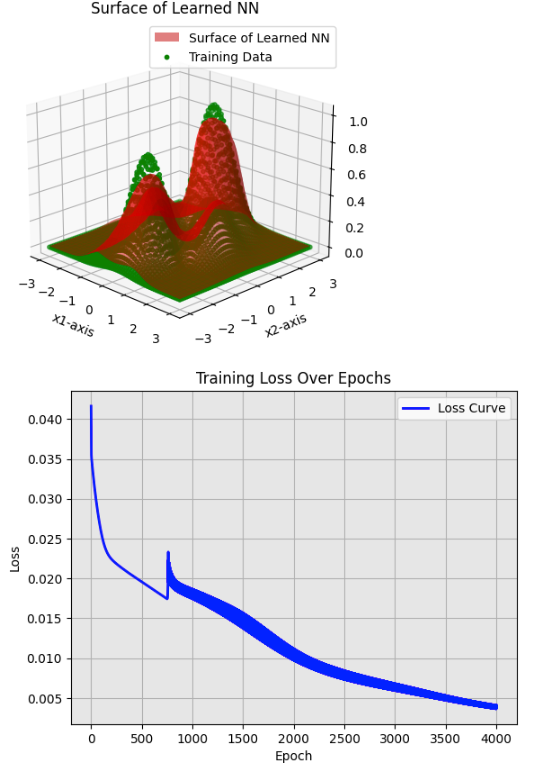

/tmp/ipython-input-3387213478.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z1[i, j] = makePredictions(point, W)


(3721, 2)


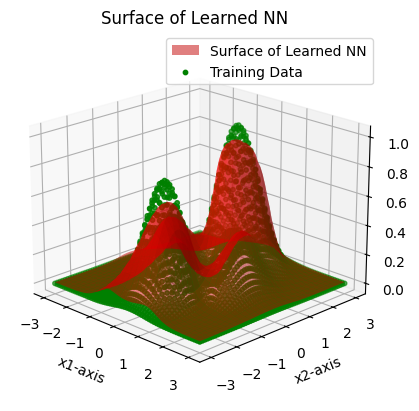

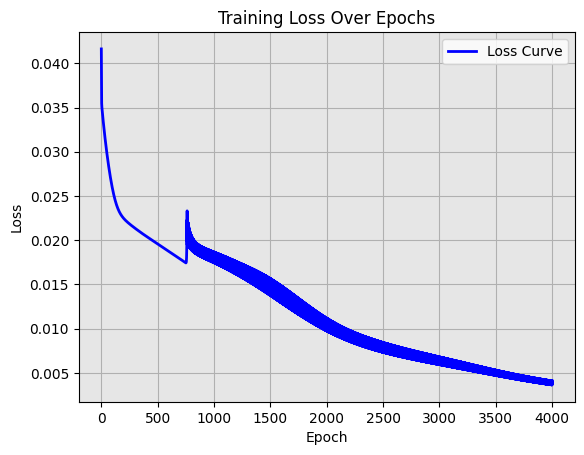

In [10]:
# @title Answer 2.6
# Meshgrid over [-3, 3] with 0.1 step
x_vals = np.arange(-3, 3.1, 0.1)
y_vals = np.arange(-3, 3.1, 0.1)
XX, YY = np.meshgrid(x_vals, y_vals)

# Fill Z1 by predicting for each point in the mesh
Z1 = np.zeros_like(XX)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        point = np.array([[XX[i, j], YY[i, j]]])  # shape (1, 2)
        Z1[i, j] = makePredictions(point, W)

# --- 3D Surface Plot ---
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(XX, YY, Z1, color='r', alpha=0.5, edgecolor='none', label = 'Surface of Learned NN')
print(inputs.shape)
# Scatter plot for training data
ax.scatter(inputs[:, 0], inputs[:, 1], targets, c='g', s=10, label='Training Data')

ax.set_xlabel('x1-axis')
ax.set_ylabel('x2-axis')
ax.set_zlabel('y-axis')
ax.set_title('Surface of Learned NN')
ax.legend(loc='upper right')
ax.view_init(elev=20, azim=-45)
ax.grid(True)
fig.patch.set_facecolor('white')

# --- Loss Plot ---
plt.figure()
plt.plot(range(1, num_epochs + 1), loss, 'b', linewidth=2, label='Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.grid(True)
plt.box(True)
plt.legend()
plt.show()


####**Task 2.7:**
Use Python library Kera to solve the same peaks problem. For this task use Stochastic Gradient Descent (SGD). Use the functional API found [here](https://keras.io/guides/functional_api/).
Python has a number of libraries designed for building neural networks, with [PyTorch](https://pytorch.org/) being another example. Keras is a friendly starter library, but feel free to research other libraries and try and rebuild the code using it.
Reproduce Fig. 5.
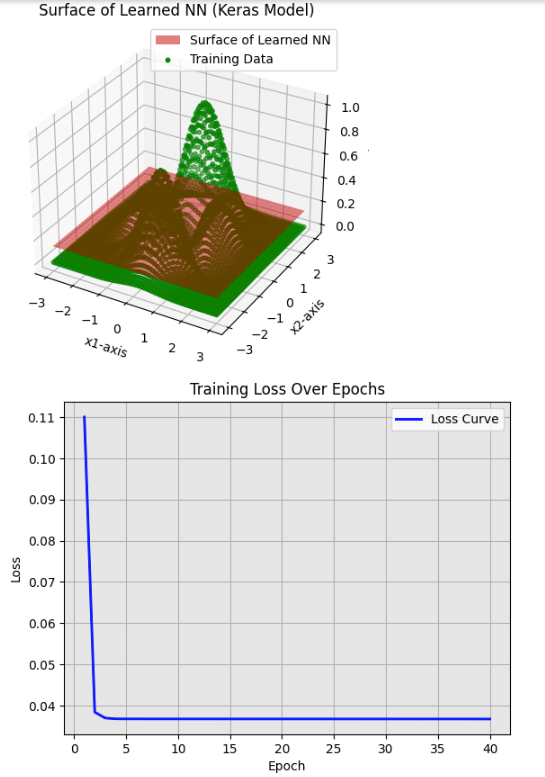

In [11]:

#Load the peaks data

# Step size and domain
x1_vals = np.arange(-3, 3.1, 0.1)
x2_vals = np.arange(-3, 3.1, 0.1)

# Create grid
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Y = peaks(X1,X2)

# Flatten grid and output values
x1 = X1.ravel()
x2 = X2.ravel()
y  = Y.ravel()

data = np.column_stack((x1,x2,y))
#Normalise data
data[:,2] = np.abs(data[:,2])
data[:,2]/=np.max(data[:,2])


#Define neural network structure
inputLayerSize =2
hiddenLayerSize =20
outputLayerSize =1
epochs = 40 #Use a smaller number in the lab to quickly test, use a larger number for better results
# define the deep feedforward network in keras
inputs = keras.Input(shape=(inputLayerSize,))
x = layers.Dense(hiddenLayerSize, activation="sigmoid")(inputs)
x = layers.Dense(hiddenLayerSize, activation="sigmoid")(x)
x = layers.Dense(hiddenLayerSize, activation="sigmoid")(x)
output = layers.Dense(outputLayerSize, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=output)

model.summary() # Print a summary of the model. The param number is calculated using input*weights *
                  #number of bias terms (number of units)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='mean_squared_error', metrics = ["accuracy"])

history = model.fit(data[:,:2], data[:,2], epochs=epochs, batch_size=1, verbose=1) #verbose=1 will print progress info
                                                                         #verbose=0 gives no info but will be faster

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921 (3.60 KB)

 Trainable params: 921 (3.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0456
Epoch 2/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0370
Epoch 3/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0360
Epoch 4/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0377
Epoch 5/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0358
Epoch 6/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0364
Epoch 7/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0365
Epoch 8/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0363
Epoch 9/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0362
Epoch 10/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0409
Epoch 11/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0000

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


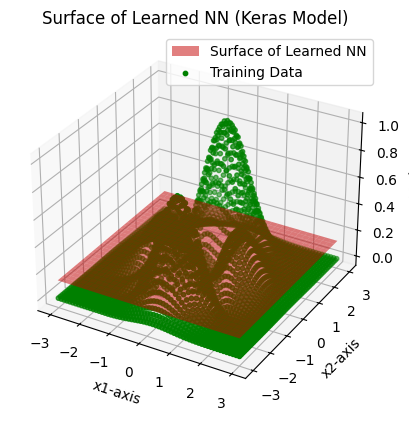

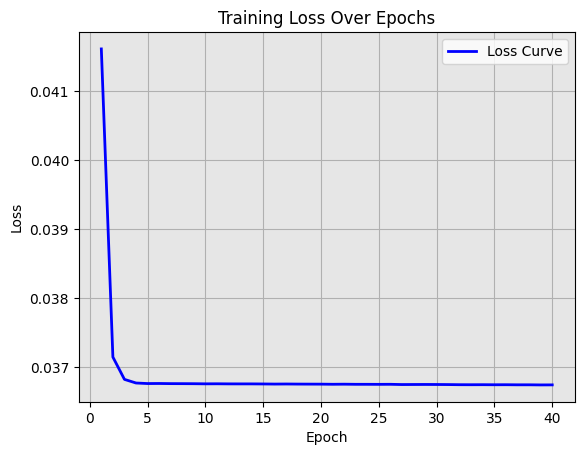

In [12]:
# @title 2.7 Cont...
# Meshgrid over [-3, 3] with 0.1 step
x_vals = np.arange(-3, 3.1, 0.1)
y_vals = np.arange(-3, 3.1, 0.1)
XX, YY = np.meshgrid(x_vals, y_vals)

# Reshape XX and YY for prediction
input_points = np.column_stack((XX.ravel(), YY.ravel()))

# Use the trained Keras model to predict the output for each point
Z1 = model.predict(input_points)

# Reshape Z1 back to the original grid shape
Z1 = Z1.reshape(XX.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(XX, YY, Z1, color='r', alpha=0.5, edgecolor='none', label='Surface of Learned NN')

# Add a scatter plot to the same figure
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='g', s=10, label='Training Data')

# Labels and title
ax.set_xlabel('x1-axis')
ax.set_ylabel('x2-axis')
ax.set_zlabel('y-axis')
ax.set_title('Surface of Learned NN (Keras Model)')

# Legend (Matplotlib requires a trick to handle surface + scatter legends)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

# View angle
ax.view_init(elev=30, azim=-60)  # similar to MATLAB view(3)

# Grid and background color
ax.grid(True)
fig.patch.set_facecolor('white')

plt.show()


# --- Loss Plot ---
plt.figure()
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], 'b', linewidth=2, label='Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.grid(True)
plt.box(True)
plt.legend()
plt.show()

####****Task 2.8****
Using Keras tools again, repeat Task 2.7 using **Adaptive movement estimation** (Adam). Reproduce Figure 6.

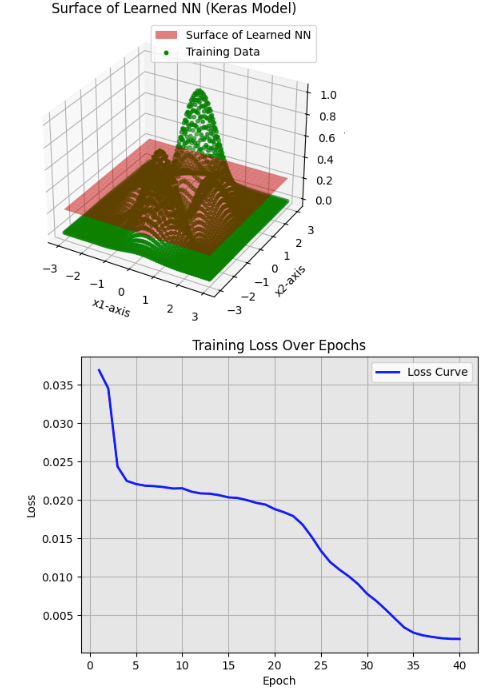

In [13]:
# @title Answer 2.8
#Load the peaks data

# Step size and domain
x1_vals = np.arange(-3, 3.1, 0.1)
x2_vals = np.arange(-3, 3.1, 0.1)

# Create grid
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Y = peaks(X1,X2)

# Flatten grid and output values
x1 = X1.ravel()
x2 = X2.ravel()
y  = Y.ravel()

data = np.column_stack((x1,x2,y))
#Normalise data
data[:,2] = np.abs(data[:,2])
data[:,2]/=np.max(data[:,2])


#Define neural network structure
inputLayerSize =2
hiddenLayerSize =20
outputLayerSize =1
epochs = 40 #Use a smaller number in the lab to quickly test, use a larger number for better results
# define the deep feedforward network in keras
inputs = keras.Input(shape=(inputLayerSize,))
x = layers.Dense(hiddenLayerSize, activation="sigmoid")(inputs)
x = layers.Dense(hiddenLayerSize, activation="sigmoid")(x)
x = layers.Dense(hiddenLayerSize, activation="sigmoid")(x)
output = layers.Dense(outputLayerSize, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=output)

model.summary() # Print a summary of the model. The param number is calculated using input*weights *
                  #number of bias terms (number of units)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ["accuracy"])

history = model.fit(data[:,:2], data[:,2], epochs=epochs, batch_size=1, verbose=1) #verbose=1 will print progress info
                                                                         #verbose=0 gives no info but will be faster

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 921 (3.60 KB)

 Trainable params: 921 (3.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0556
Epoch 2/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0350
Epoch 3/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0354
Epoch 4/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0254
Epoch 5/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0221
Epoch 6/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0234
Epoch 7/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0237
Epoch 8/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0210
Epoch 9/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0205
Epoch 10/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0202
Epoch 11/40
3721/3721 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.000

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


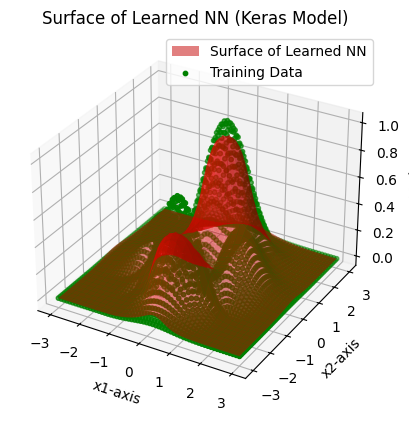

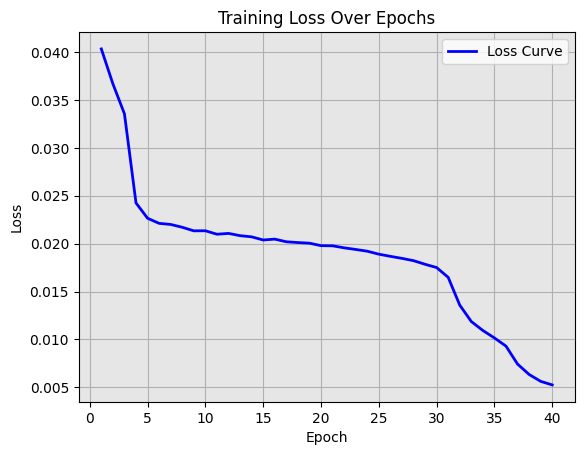

In [14]:
# @title Answer 2.8 Cont...
# Meshgrid over [-3, 3] with 0.1 step
x_vals = np.arange(-3, 3.1, 0.1)
y_vals = np.arange(-3, 3.1, 0.1)
XX, YY = np.meshgrid(x_vals, y_vals)

# Reshape XX and YY for prediction
input_points = np.column_stack((XX.ravel(), YY.ravel()))

# Use the trained Keras model to predict the output for each point
Z1 = model.predict(input_points)

# Reshape Z1 back to the original grid shape
Z1 = Z1.reshape(XX.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(XX, YY, Z1, color='r', alpha=0.5, edgecolor='none', label='Surface of Learned NN')

# Add a scatter plot to the same figure
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='g', s=10, label='Training Data')

# Labels and title
ax.set_xlabel('x1-axis')
ax.set_ylabel('x2-axis')
ax.set_zlabel('y-axis')
ax.set_title('Surface of Learned NN (Keras Model)')

# Legend (Matplotlib requires a trick to handle surface + scatter legends)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')

# View angle
ax.view_init(elev=30, azim=-60)  # similar to MATLAB view(3)

# Grid and background color
ax.grid(True)
fig.patch.set_facecolor('white')

plt.show()


# --- Loss Plot ---
plt.figure()
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], 'b', linewidth=2, label='Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.gca().set_facecolor((0.9, 0.9, 0.9))
plt.grid(True)
plt.box(True)
plt.legend()
plt.show()

## **4 Discussion**
Backpropagation relies on the Gradient Descent (GD) optimization method. GD is  only assured to converge to local optima when solving optimization problems. Consequently, any algorithm utilizing GD may not always discover the optimal neural network that best fits the data. For instance, for the $\texttt{peaks}$ data Matlab's inbuilt NN trainer seems to converge to the local min of all zero weights, see Fig. 5.

In our specific case, our custom implementation of backpropagation surpasses the built-in Matlab implementation, which is grounded in Stochastic Gradient Descent (SGD) (compare Fig. 4 and Fig. 5). Nevertheless, the Matlab implementation using the Adaptive Moment Estimation (Adam) algorithm outperforms our method (compare Fig. 4 and Fig. 6). This performance gap could be attributed to various factors, such as differences in the ability to adapt the learning parameter, the nature of the dataset, or the specific characteristics of the optimization landscape.

Rather than simply implementing NN training through the Matlab toolbox we coded the problem from scratch for the following reasons:

*  **Software Evolves and Adapts:**In the rapidly evolving landscape of technology, software, including foundational tools like Matlab, undergo continuous updates and improvements. However, not all software enjoys a perpetual existence. Some applications and platforms have faced the inevitability of discontinuation. Prominent examples of this include once-popular services like Myspace, Skype, and Windows Phone. Therefore, rather than learning specific skills of a particular software it is better to have transferable skills like understanding how to train NNs from first principles. We strive to become data scientist that know Matlab rather than Matlab coders that know how to use a specific toolbox to solve ML problems.


*  **Understanding Neural Network** Backpropagation is a fundamental algorithm for training neural networks. Implementing it helps you grasp the inner workings of neural networks, including how they learn and adapt.

*  **Mathematical Insight:** Backpagation involves a fair amount of calculus and linear algebra. Implementing it can deepen your understanding of these mathematical concepts and their application in machine learning.

*  **Flexibility and Customization:** When you implement backpropagation from scratch, you have the freedom to customize various aspects of the algorithm, such as the activation functions, loss functions, and network architecture. This flexibility allows you to experiment and gain insights into how these choices affect training and performance.

*  **Debugging Skills:** Developinour own backpropagation implementation helps you become proficient at debugging and troubleshooting. You'll encounter and solve various issues related to gradient calculations, weight updates, and numerical stability, which are valuable skills in machine learning.

*  **Hyperparameter Tuning:** Implenting backpropagation allows you to fine-tune hyperparameters like learning rate, batch size, and regularization techniques. You'll gain an appreciation for how these choices impact the learning process and model performance.

*  **Optimization Techniques: Backropagation can be extended with various optimization techniques, such as gradient clipping, learning rate schedules, and momentum. Implementing these enhancements can give you hands-on experience with methods to accelerate and stabilize training.

*  **Transferable Knowledge:** The knowledge and skills you gain from implementing backpropagation are transferable to other machine learning and deep learning frameworks. You'll be better equipped to work with complex models and solve real-world problems.

*  **Problem Solving:** Implementing backpropagation teaches you problem-solving skills. You'll often need to overcome challenges related to vanishing gradients, overfitting, and underfitting, which are common in deep learning tasks.

*  **Visualizing Learning:** By implementing backpropagation, you can create your own visualizations of the learning process, showing how the loss decreases and how the model's performance improves over time.


##**5 Further Exploration**
Now that you understand backpropagation here is some suggestions of things to try:

*  Explore what happens when you change the length (number of layers) or thickness (number of neurons) of the NN
*  Try changing the architecture of the NN. How would you implement other activation functions rather than sigmoid? What would you need to change if your NN ended with a weight multiplication, that is you fitted a function of the form $	y={W}_{l+1}\phi\left({W}_l \phi\left({W}_{l-1} \left(\ldots \phi\left({W}_1 x\right) \ldots\right)\right)\right)$ rather than $	y=\phi\left({W}_l \phi\left({W}_{l-1} \left(\ldots \phi\left({W}_1 x\right) \ldots\right)\right)\right)$ shown in Fig. 1.